In [0]:
from pyspark.sql import SparkSession
data_spark = SparkSession.builder.appName('DataFrame_article').getOrCreate()
data_spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql import SQLContext

sqlContext = SQLContext(sc)
spark_df = sqlContext.sql("Select * from employee_attrition")

/databricks/spark/python/pyspark/sql/context.py:117: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [0]:
from pyspark.sql.functions import *
# check null values in dataset
null_counts = spark_df.select([when(isnull(c), 1).otherwise(0).alias(c) for c in spark_df.columns]).groupBy().sum()
for column in spark_df.columns:
    print(f"{column}: {null_counts.collect()[0][f'sum({column})']}")


Age: 0
Attrition: 0
BusinessTravel: 0
DailyRate: 0
Department: 0
DistanceFromHome: 0
Education: 0
EducationField: 0
EmployeeCount: 0
EmployeeNumber: 0
EnvironmentSatisfaction: 0
Gender: 0
HourlyRate: 0
JobInvolvement: 0
JobLevel: 0
JobRole: 0
JobSatisfaction: 0
MaritalStatus: 0
MonthlyIncome: 0
MonthlyRate: 0
NumCompaniesWorked: 0
Over18: 0
OverTime: 0
PercentSalaryHike: 0
PerformanceRating: 0
RelationshipSatisfaction: 0
StandardHours: 0
StockOptionLevel: 0
TotalWorkingYears: 0
TrainingTimesLastYear: 0
WorkLifeBalance: 0
YearsAtCompany: 0
YearsInCurrentRole: 0
YearsSinceLastPromotion: 0
YearsWithCurrManager: 0


### Descriptive data analysis

In [0]:
display(spark_df.describe())

summary,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
mean,36.923809523809524,null,null,802.4857142857143,null,9.19251700680272,2.912925170068027,null,1.0,1024.865306122449,2.721768707482993,null,65.89115646258503,2.7299319727891156,2.0639455782312925,null,2.7285714285714286,null,6502.931292517007,14313.103401360544,2.6931972789115646,null,null,15.209523809523809,3.1537414965986397,2.7122448979591836,80.0,0.7938775510204081,11.279591836734694,2.7993197278911564,2.7612244897959184,7.0081632653061225,4.229251700680272,2.1877551020408164,4.12312925170068
stddev,9.135373489136729,null,null,403.50909994352804,null,8.10686443566608,1.0241649445978718,null,0.0,602.0243348474752,1.0930822146350003,null,20.329427593996176,0.7115611429632297,1.1069398989351202,null,1.1028461230547213,null,4707.956783097992,7117.786044059972,2.4980090060707463,null,null,3.6599377165396385,0.36082352460434397,1.0812088864403517,0.0,0.8520766679308381,7.780781675514995,1.2892706207958466,0.7064758297141507,6.126525152403571,3.623137034670627,3.2224302791379693,3.5681361205404363
min,18,No,Non-Travel,1001,Human Resources,1,1,Human Resources,1,1,1,Female,100,1,1,Healthcare Representative,1,Divorced,10008,10007,0,Y,No,11,3,1,80,0,0,0,1,0,0,0,0
max,60,Yes,Travel_Rarely,999,Sales,9,5,Technical Degree,1,999,4,Male,99,4,5,Sales Representative,4,Single,9998,9983,9,Y,Yes,25,4,4,80,3,9,6,4,9,9,9,9


# DATA PREPROCESSING

In [0]:
from pyspark.sql.types import IntegerType

# type cast to integer datatype
spark_df = spark_df.withColumn("Age", col("Age").cast(IntegerType()))
spark_df = spark_df.withColumn("DailyRate", col("DailyRate").cast(IntegerType()))
spark_df = spark_df.withColumn("DistanceFromHome", col("DistanceFromHome").cast(IntegerType()))
spark_df = spark_df.withColumn("Education", col("Education").cast(IntegerType()))
spark_df = spark_df.withColumn("EmployeeCount", col("EmployeeCount").cast(IntegerType()))
spark_df = spark_df.withColumn("EmployeeNumber", col("EmployeeNumber").cast(IntegerType()))
spark_df = spark_df.withColumn("EnvironmentSatisfaction", col("EnvironmentSatisfaction").cast(IntegerType()))
spark_df = spark_df.withColumn("HourlyRate", col("HourlyRate").cast(IntegerType()))
spark_df = spark_df.withColumn("JobInvolvement", col("JobInvolvement").cast(IntegerType()))
spark_df = spark_df.withColumn("JobLevel", col("JobLevel").cast(IntegerType()))
spark_df = spark_df.withColumn("JobSatisfaction", col("JobSatisfaction").cast(IntegerType()))
spark_df = spark_df.withColumn("MonthlyIncome", col("MonthlyIncome").cast(IntegerType()))
spark_df = spark_df.withColumn("MonthlyRate", col("MonthlyRate").cast(IntegerType()))
spark_df = spark_df.withColumn("NumCompaniesWorked", col("NumCompaniesWorked").cast(IntegerType()))
spark_df = spark_df.withColumn("PercentSalaryHike", col("PercentSalaryHike").cast(IntegerType()))
spark_df = spark_df.withColumn("PerformanceRating", col("PerformanceRating").cast(IntegerType()))
spark_df = spark_df.withColumn("RelationshipSatisfaction", col("RelationshipSatisfaction").cast(IntegerType()))
spark_df = spark_df.withColumn("StandardHours", col("StandardHours").cast(IntegerType()))
spark_df = spark_df.withColumn("StockOptionLevel", col("StockOptionLevel").cast(IntegerType()))
spark_df = spark_df.withColumn("TotalWorkingYears", col("TotalWorkingYears").cast(IntegerType()))
spark_df = spark_df.withColumn("TrainingTimesLastYear", col("TrainingTimesLastYear").cast(IntegerType()))
spark_df = spark_df.withColumn("WorkLifeBalance", col("WorkLifeBalance").cast(IntegerType()))
spark_df = spark_df.withColumn("YearsAtCompany", col("YearsAtCompany").cast(IntegerType()))
spark_df = spark_df.withColumn("YearsInCurrentRole", col("YearsInCurrentRole").cast(IntegerType()))
spark_df = spark_df.withColumn("YearsSinceLastPromotion", col("YearsSinceLastPromotion").cast(IntegerType()))
spark_df = spark_df.withColumn("YearsWithCurrManager", col("YearsWithCurrManager").cast(IntegerType()))
spark_df = spark_df.withColumn("YearsSinceLastPromotion", col("YearsSinceLastPromotion").cast(IntegerType()))

In [0]:
spark_df = spark_df.drop("StandardHours","Over18","EmployeeCount")# drop the unimportant column
spark_df = spark_df.drop("JobLevel", "MonthlyIncome")# to reduce multicollinearity afffect in regression.

In [0]:
from pyspark.sql.functions import when
# transform target variable to binary format (1 or 0)
spark_df = spark_df.withColumn("Attrition", when(spark_df["Attrition"] == "Yes", 1).otherwise(0))
spark_df = spark_df.withColumn("Attrition", col("Attrition").cast(IntegerType()))

In [0]:
#Setting the target variable
target = 'Attrition'

In [0]:
# categorical variables
dtypes = spark_df.dtypes
cat_input = []
for i in range(0, len(spark_df.columns)):
  if dtypes[i][1] == 'string': #identify categorical variable
    cat_input.append(dtypes[i][0]) 
cat_input = list(set(cat_input)-set(target)) 


In [0]:
# numerical variables
num_input = list(set(spark_df.columns) - set([target]) - set(cat_input))


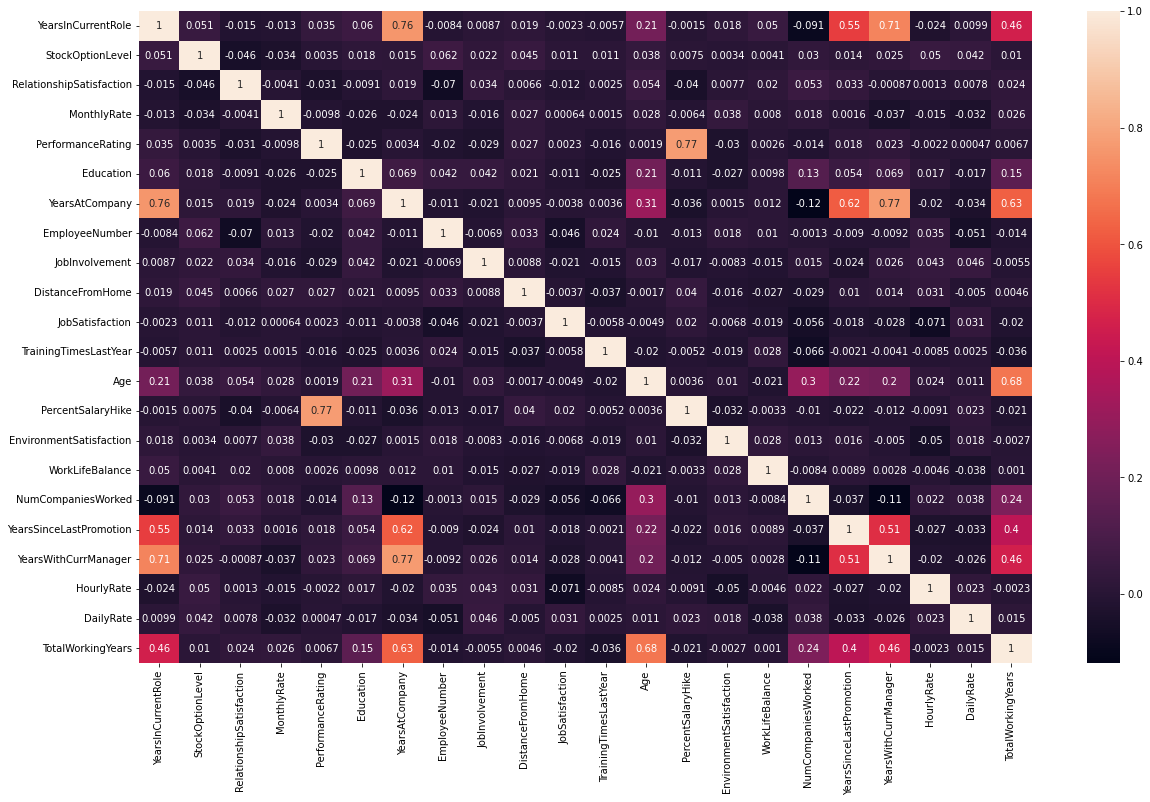

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

num_df = spark_df.select(num_input)
pandas_df = num_df.toPandas()
correlation_matrix = pandas_df.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

##### Normalize Variables

In [0]:
# normalize a dataset
from pyspark import keyword_only  ## < 2.0 -> pyspark.ml.util.keyword_only
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType


class Standardizer(Transformer, HasInputCol, HasOutputCol):

    def __init__(self, inputCol=None, outputCol=None):
        super(Standardizer, self).__init__()
        self.setParams(inputCol = inputCol , outputCol = outputCol)
        
    def setParams(self, inputCol=None, outputCol=None):
      return self._set(inputCol = inputCol, outputCol = outputCol)

    def _transform(self, dataset):
      from pyspark.sql.functions import stddev, mean, col
      out_col = self.getOutputCol()
      in_col = dataset[self.getInputCol()]
      xmin, xmax = dataset.select(min(in_col), max(in_col)).first()
      return dataset.withColumn(out_col, (in_col - xmin)/(xmax-xmin))    


In [0]:
standardizers = [Standardizer(inputCol = column, outputCol = column+"_standardized") for column in num_input]
#standardizers

##### Encode Dummy Variables

In [0]:
from pyspark import keyword_only  
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer

indexers = [StringIndexer(inputCol = column, outputCol = column+"_index") for column in cat_input]
encoders = [OneHotEncoder(inputCol = column+"_index", outputCol = column+"_dummy") for column in cat_input]

##### Combine Steps

In [0]:
input_cols = []
for i in cat_input:
  input_cols.append(i+"_dummy")
for i in num_input:
  input_cols.append(i+"_standardized")
#input_cols

In [0]:
from pyspark.ml.feature import StringIndexer
import functools 
import operator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression

stages = []
assembler = VectorAssembler(inputCols= input_cols, outputCol="features") #conactenates all input variables and names as features [[0,1,0],30,20,40000]
stages = functools.reduce(operator.concat, [indexers, encoders, standardizers]) #indexers,  encoders, standardizers])
stages.append(assembler)
#stages

##### Run Spark ML pipeline

In [0]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=stages)
spark_df = pipeline.fit(spark_df).transform(spark_df)

##### Split train and test set

In [0]:
train, test = spark_df.randomSplit([0.7, 0.3], seed = 2008)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 1026
Test Dataset Count: 444


### MODEL FITTING

###### Logistic Regression

In [0]:
from pyspark.ml.classification import *
from pyspark.ml.regression import *

# create logistic regression
lr = LogisticRegression(labelCol=target, featuresCol="features", maxIter=10)
lr_model = lr.fit(train)

#tranform model to test
lr_result = lr_model.transform(test)
lr_result.select('Attrition', 'prediction', 'probability').show(5)

+---------+----------+--------------------+
|Attrition|prediction|         probability|
+---------+----------+--------------------+
|        0|       0.0|[0.91227865587624...|
|        1|       1.0|[0.04535355546710...|
|        0|       0.0|[0.79068367858827...|
|        1|       1.0|[0.20827476090257...|
|        1|       1.0|[0.22912871406472...|
+---------+----------+--------------------+
only showing top 5 rows



### MODEL PERFORMANCE AND EVALUATION

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc


In [0]:
# logistic regression model evaluation
lr_eval1 = BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol=target)
lr_eval2 = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol=target)
lr_AUC = lr_eval1.evaluate(lr_result)
lr_ACC = lr_eval2.evaluate(lr_result, {lr_eval2.metricName:"accuracy"})

##### ROC Curve for Model

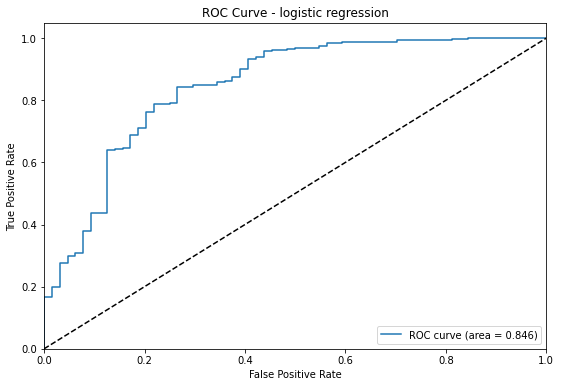

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_test, y_score, title):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")

def prepare_roc_data(results, target):
    pred_label = results.select("probability", target)
    pred_label_col = pred_label.collect()
    pred_label_list = [(float(x[0][0]), 1.0-float(x[1])) for x in pred_label_col]
    y_test = [x[1] for x in pred_label_list]
    y_score = [x[0] for x in pred_label_list]
    return y_test, y_score

# Logistic Regression
y_test_lr, y_score_lr = prepare_roc_data(lr_result, target)
fig, ax = plt.subplots(figsize=(9, 6))
plot_roc_curve(y_test_lr, y_score_lr, "ROC Curve - logistic regression")

plt.show()


A model with 85% Area Under the ROC curve, can be used to identify employees who are at a higher risk of leaving the company, allowing management to take targeted actions to retain valuable talent such as focus on improve work condition, employee benefits etc.

##### Evaluation Metrics

In [0]:
def get_metrics(result, target):
    cm = result.crosstab("prediction", target)
    cm = cm.toPandas()
    
    TP = cm["1"][0]
    FP = cm["0"][0]
    TN = cm["0"][1]
    FN = cm["1"][1]
    Accuracy = (TP + TN) / (TP + FP + TN + FN)
    Sensitivity = TP / (TP + FN)
    Specificity = TN / (TN + FP)
    Precision = TP / (TP + FP)
    
    return Accuracy, Sensitivity, Specificity, Precision

Accuracy_lr, Sensitivity_lr, Specificity_lr, Precision_lr = get_metrics(lr_result, target)


In [0]:
# create the column labels
header = "{:<20}{:<20}".format("Metric", "Logistic Regression")

# create the row labels and values
rows = [
    ("Accuracy", Accuracy_lr),
    ("Sensitivity", Sensitivity_lr),
    ("Specificity", Specificity_lr),
    ("Precision", Precision_lr),
]

print(header)
print("-" * len(header))

for row in rows:
    label, lr_value = row
    formatted_row = "{:<20}{:<20.2f}".format(label, lr_value)
    print(formatted_row)


Metric              Logistic Regression 
----------------------------------------
Accuracy            0.90                
Sensitivity         0.52                
Specificity         0.96                
Precision           0.69                


The model accuracy and specificity correctly predicted that higher proportion of employees will stay with company.

##### Confusion Matrix

In [0]:
# Create confusion matrix
tn = lr_result.filter('prediction = 0 AND ' + target + ' = 0').count()
fn = lr_result.filter('prediction = 0 AND ' + target + ' = 1').count()
tp = lr_result.filter('prediction = 1 AND ' + target + ' = 1').count()
fp = lr_result.filter('prediction = 1 AND ' + target + ' = 0').count()

confusion_matrix = spark.createDataFrame([(tn, fp), (fn, tp)], ['Actual 0', 'Actual 1']).toPandas()

print("Confusion matrix:")
print(confusion_matrix)

Confusion matrix:
   Actual 0  Actual 1
0       365        15
1        31        33


In Summary, based on confusion matrix, the performance matrix of the model identify that 82% of the majority of employees are correctly predicted to stay with the company, and only a few of them (7%) are likely to leave which employees are at the high risk. Therefore the model help to identifty appropriate measures to retain them.